<a href="https://colab.research.google.com/github/mustafacavusoglu/CNN-Exercises/blob/main/kerasGanBasic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from keras.layers import Dense, Dropout,Input,ReLU
from keras.models import Model,Sequential
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [22]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [23]:
x_train = (x_train.astype(np.float32)-127.5)/127.5
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])

In [24]:
print(x_train.shape)

(60000, 784)


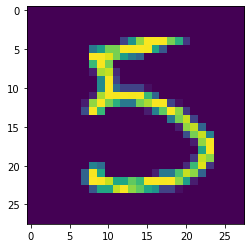

In [25]:
    plt.imshow(x_test[15])

In [26]:
def create_generaor():
    generator = Sequential()
    generator.add(Dense(units = 512, input_dim = 100))
    generator.add(ReLU())
    
    generator.add(Dense(units = 1024))
    generator.add(ReLU())
    
    generator.add(Dense(units = 2048))
    generator.add(ReLU())
    
    generator.add(Dense(units = 784, activation = "tanh"))
   
    generator.compile(loss = "binary_crossentropy",
                     optimizer=Adam(learning_rate = 0.002,beta_1 = 0.5))
    
    return generator

g = create_generaor()
print(g.summary())







    
    
    

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               51712     
_________________________________________________________________
re_lu_6 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              525312    
_________________________________________________________________
re_lu_7 (ReLU)               (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 2048)              2099200   
_________________________________________________________________
re_lu_8 (ReLU)               (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 784)              

In [27]:
def create_discriminator():
    discriminator = Sequential()
    discriminator.add(Dense(units = 2048, input_dim = 784))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))
    
    discriminator.add(Dense(units = 1024))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.2))
    
    discriminator.add(Dense(units = 256))
    discriminator.add(ReLU())
    
    discriminator.add(Dense(units = 1, activation = "sigmoid"))
    
    discriminator.compile(loss = "binary_crossentropy",
                     optimizer=Adam(learning_rate = 0.002,beta_1 = 0.5))
    return discriminator
    

In [28]:
d = create_discriminator()
print(d.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
re_lu_9 (ReLU)               (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
re_lu_10 (ReLU)              (None, 1024)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)              

In [29]:
def create_gan(discriminator,generator):
    discriminator.trainable = False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs = gan_input, outputs = gan_output)
    gan.compile(loss = "binary_crossentropy", optimizer="adam")
    return gan

In [30]:
gan = create_gan(d,g)
print(gan.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 784)               4282640   
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 3968513   
Total params: 8,251,153
Trainable params: 4,282,640
Non-trainable params: 3,968,513
_________________________________________________________________
None


In [31]:
epochs = 50
batch_size = 512

for e in range(epochs):
    for _ in range(batch_size):
        noise = np.random.normal(0,1,[batch_size,100])
        generated_images = g.predict(noise)
        image_bathc = x_train[np.random.randint(0, x_train.shape[0],batch_size)]
        
        x = np.concatenate([image_bathc,generated_images])
        y_dis = np.zeros(batch_size*2)
        y_dis[:batch_size] = 1
        
        d.trainable = True
        d.train_on_batch(x,y_dis)
        
        noise = np.random.normal(0,1,[batch_size,100])
        y_gen = np.ones(batch_size)
        d.trainable = False
        
        gan.train_on_batch(noise,y_gen)
    print("Epoch : ",e)

Epoch :  0
Epoch :  1
Epoch :  2
Epoch :  3
Epoch :  4
Epoch :  5
Epoch :  6
Epoch :  7
Epoch :  8
Epoch :  9
Epoch :  10
Epoch :  11
Epoch :  12
Epoch :  13
Epoch :  14
Epoch :  15
Epoch :  16
Epoch :  17
Epoch :  18
Epoch :  19
Epoch :  20
Epoch :  21
Epoch :  22
Epoch :  23
Epoch :  24
Epoch :  25
Epoch :  26
Epoch :  27
Epoch :  28
Epoch :  29
Epoch :  30
Epoch :  31
Epoch :  32
Epoch :  33
Epoch :  34
Epoch :  35
Epoch :  36
Epoch :  37
Epoch :  38
Epoch :  39
Epoch :  40
Epoch :  41
Epoch :  42
Epoch :  43
Epoch :  44
Epoch :  45
Epoch :  46
Epoch :  47
Epoch :  48
Epoch :  49


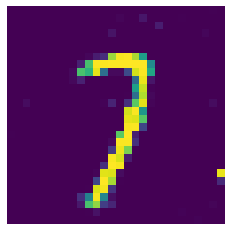

In [43]:
noise= np.random.normal(loc=0, scale=1, size=[100, 100])
generated_images = g.predict(noise)
generated_images = generated_images.reshape(100,28,28)
plt.imshow(generated_images[35], interpolation='nearest')
plt.axis('off')
#plt.savefig("99.png")
plt.show()
